In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf     
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from skimage.feature import hog

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


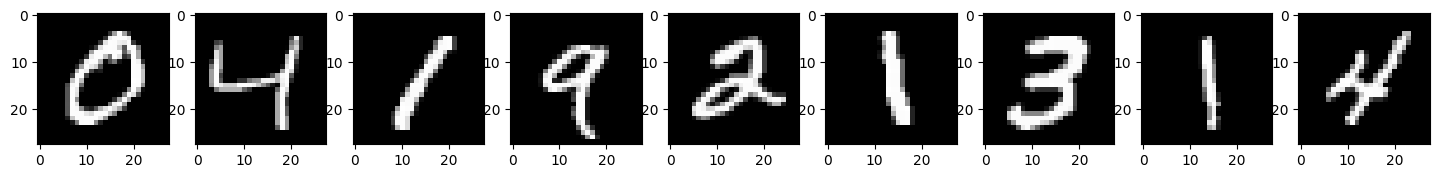

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1, 10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
noise_factor = 0
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

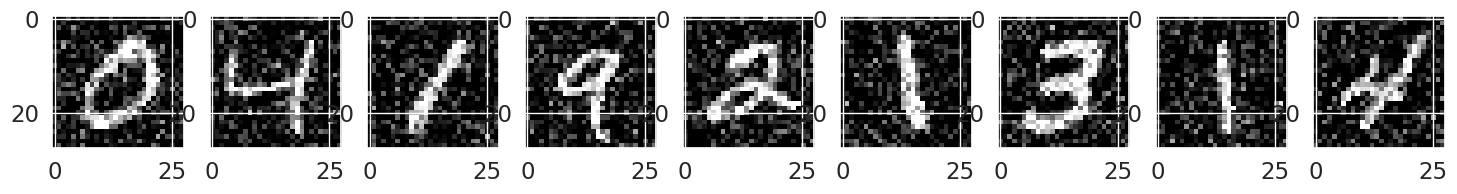

In [ ]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1, 10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train_noisy[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.35),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:

model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
____________________________________________

In [ ]:
reduceLearningRate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.0001)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# Train model with .fit function
history = model.fit(
    # Pass train_data and train_labels (the pre-process data saved before)
    x_train_noisy,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=100,
    shuffle= True,
    callbacks=[reduceLearningRate, earlyStopping]
)
# model.save(r'/content/drive/MyDrive/Machine Learning/ANN_MNIST/Model/test.h5')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


480/480 [==============================] - 3s 4ms/step - loss: 0.2564 - accuracy: 0.9210 - val_loss: 0.1234 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 2/30
480/480 [==============================] - 2s 5ms/step - loss: 0.1222 - accuracy: 0.9639 - val_loss: 0.0943 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 3/30
480/480 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9703 - val_loss: 0.0897 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 4/30
480/480 [==============================] - 2s 4ms/step - loss: 0.0742 - accuracy: 0.9775 - val_loss: 0.0853 - val_accuracy: 0.9753 - lr: 0.0010
Epoch 5/30
480/480 [==============================] - 2s 3ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0817 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 6/30
480/480 [==============================] - 2s 3ms/step - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.0738 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 7/30
480/480 [==============================] - 3s 6ms/step - loss: 0.0517 

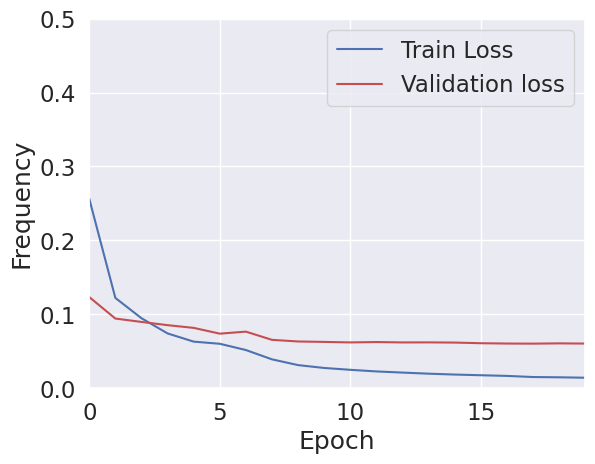

In [ ]:
plt.plot(history.history["loss"], 'b', label="Train Loss")
plt.plot(history.history["val_loss"], 'r', label="Validation loss")
plt.axis([0, 19, 0, 0.5])
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.style.use('default')

313/313 [==============================] - 1s 2ms/step


<Axes: xlabel='Predict', ylabel='Actual'>

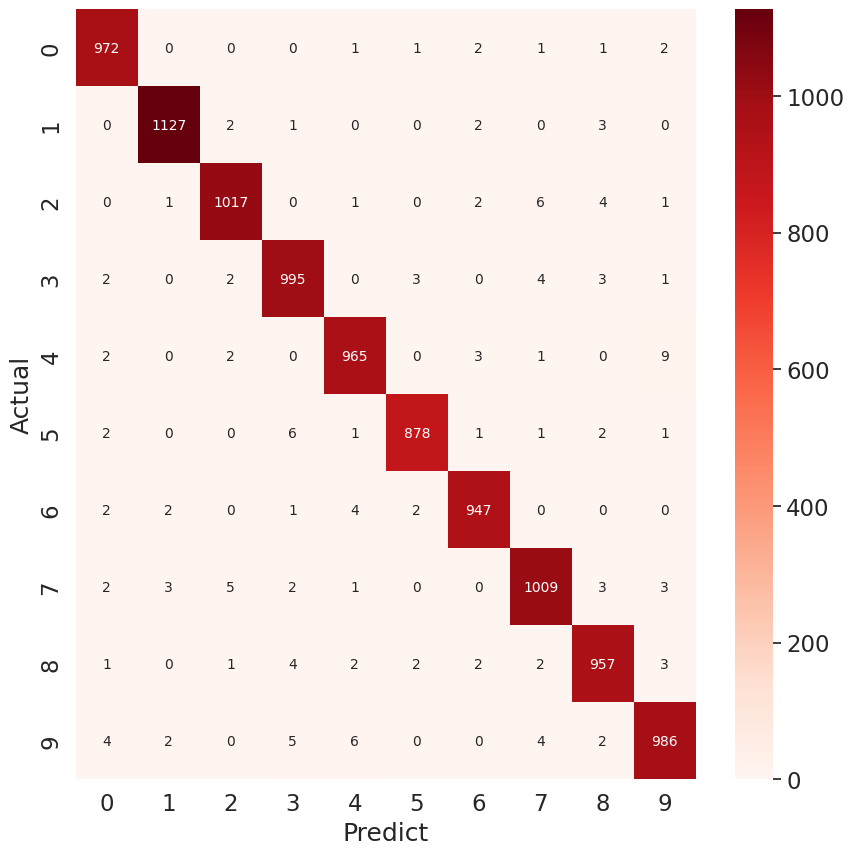

In [ ]:
predictions = model.predict(x_test_noisy)
actual = y_test
## Pass testLabels and predictions to confusion matrix
matrix = metrics.confusion_matrix(
    actual,
    np.argmax(predictions, axis = 1)
)
## Plot confusion matrix with matplotlib
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

DataFrameMatrix = pd.DataFrame(matrix, columns=np.unique(labels), index = np.unique(labels))
DataFrameMatrix.index.name = 'Actual'
DataFrameMatrix.columns.name = 'Predict'
plt.figure(figsize = (10,10))
sn.set(font_scale=1.5) 
sn.heatmap(DataFrameMatrix, cmap="Reds", annot=True, annot_kws={"size": 10}, fmt="d")

In [ ]:
print(metrics.classification_report(actual, np.argmax(predictions, axis = 1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(metrics.accuracy_score(actual, np.argmax(predictions, axis = 1)))

0.9853
